In [2]:
pwd

'/mmfs1/data/aglinska/BC-MRI-AE/misc/jacobian_pca'

In [3]:
import numpy as np 
import pandas as pd
import ants

from tqdm import tqdm
from umap import UMAP
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('../../Data/ABIDE_legend_S982.csv')
patients = df['DxGroup'].values==1
df_asd = df.iloc[patients]

In [5]:
subs = df_asd['BIDS_ID'].values

In [6]:
fn_temp = '../../../jacobians/normed_Js_masked/{}_normed_Js_masked.nii'

In [7]:
ims = [ants.image_read(fn_temp.format(sub)) for sub in tqdm(subs)]

100%|██████████| 470/470 [00:03<00:00, 137.77it/s]


In [37]:
flatmap = np.array([im.numpy().flatten() for im in ims]) 
flatmap = flatmap[:,((flatmap**2).sum(axis=0)!=0)] # only analyze voxels with values > 0
flatmap = flatmap-flatmap.mean(axis=0) # center each voxel at zero
#flatmap = flatmap-flatmap.mean(axis=1)[:,np.newaxis] # center each subject at zero
flatmap.shape

(470, 55432)

In [38]:
from sklearn.decomposition import PCA
j_pca = PCA().fit_transform(flatmap) # PCA across voxels

In [39]:
jacobians_flat = np.array([im.numpy().flatten() for im in ims])

In [40]:
# Runtime warning when correlating zero voxels, can ignore
xcorr = np.array([np.corrcoef(jacobians_flat[:,v],j_pca[:,0])[0,1] for v in tqdm(range(jacobians_flat.shape[1]))])

  0%|          | 0/262144 [00:00<?, ?it/s]/data/aglinska/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning:

invalid value encountered in true_divide

/data/aglinska/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning:

invalid value encountered in true_divide

100%|██████████| 262144/262144 [00:19<00:00, 13787.19it/s]


In [41]:
ycorr = np.array([np.corrcoef(jacobians_flat[:,v],j_pca[:,1])[0,1] for v in tqdm(range(jacobians_flat.shape[1]))])

100%|██████████| 262144/262144 [00:18<00:00, 13807.51it/s]


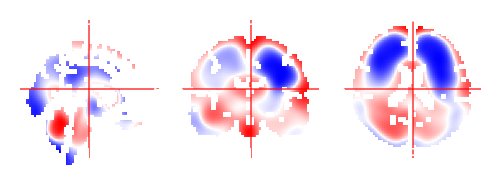

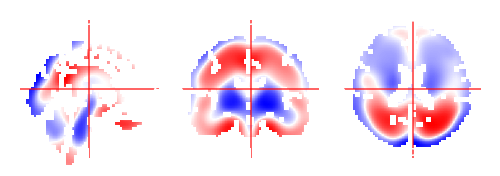

In [42]:
ims[0].new_image_like(xcorr.reshape((64,64,64))).plot_ortho(flat=True,black_bg=True,cmap='bwr')
ims[0].new_image_like(ycorr.reshape((64,64,64))).plot_ortho(flat=True,black_bg=True,cmap='bwr')

In [24]:
# ims[0].new_image_like(xcorr.reshape((64,64,64))).to_filename('xcorr-mean-centered.nii')
# ims[0].new_image_like(ycorr.reshape((64,64,64))).to_filename('ycorr-mean-centered.nii')

In [35]:
print(np.nanmin(xcorr).round(3),np.nanmean(xcorr).round(3),np.nanmax(xcorr).round(3))
print(np.nanmin(ycorr).round(3),np.nanmean(ycorr).round(3),np.nanmax(ycorr).round(3))

-0.694 -0.069 0.781
-0.665 0.003 0.774
